<a href="https://colab.research.google.com/github/soares-ed/soares-ed/blob/main/Analisando_os_Dados_do_Airbnb(Sydney).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sydney*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Sydney, e ver quais insights podem ser extraídos a partir de dados brutos.**



A escolha da cidade tem um motivo especial para mim. Entre os anos de 2012 e 2013 morei em Sydney.   Lembro que o custo com aluguel era o que mais impactava nos gastos semanais. Na época eu pagava cerca de AUD$ 185, 00 por semana em um quarto compartilhado no centro da cidade. 
Como Sydney é uma cidade turística com belas praias e um clima agradável, os locais mais caros eram próximos as praias. Manly e Bondi são as duas praias mais conhecidas da cidade e por consequência eram um dos alugueis mais caros.
Estou curioso para analisar os dados do Airbnb e ver como está a situações dos alugueis 10 anos depois.

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Sydney (good for visualisations)


Com isso em mente, vamos ao projeto


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv ("http://data.insideairbnb.com/australia/nsw/sydney/2022-03-09/visualisations/listings.csv")

## Análise dos Dados

Antes de iniciar o projeto, vamos entender como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id usado para indentificar o imóvel
* `name` -  nome da propriedade anunciada
* `host_id`  - número do proprietário do imóvel (anfitrião)
* `host_name` - nome do anfitrião
* `neighbourhood_group`  - coluna sem valores
* `neighbourhood` - nome do bairro
* `latitude` - coordenada de latitude da propriedade
* `longitude` - coordenada de longitude da propriedade
* `room_type` - tipo de quarto oferecido 
* `price` - preço de locação do imóvel
* `minimum nights` - minímo de noites que é possível alugar
* `number_of_reviews` - número de avaliações do imóvel
* `last_review` - data da última avaliação do imóvel
* `reviews_per_month`  - quantidade de avaliações no mês
* `calculated_host_listing_count` - quantidade de imóvel do mesmo anfitrião
* `availability_365` - disponibilidade ao longo do ano
* `license` - se o imóvel possui licensa de funcionamento


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3817911,1 bedroom entire floor harbour view apartment,19628833,Bob,NaN,Manly,-33.79783,151.26610,Entire home/apt,240,3,29,2022-01-30,0.44,2,269,3,Exempt
1,17350587,"Close to Macquarie Uni, Business Park and Center",58951796,Abhinav,NaN,Ryde,-33.77969,151.11832,Private room,58,90,2,2017-07-25,0.03,1,0,0,NaN
2,21635333,"Modern 2 bedder, waterviews, 3 transport options",95254100,Caroline,NaN,Ryde,-33.81783,151.09066,Entire home/apt,150,90,5,2018-01-06,0.10,1,0,0,NaN
3,27793108,Studio apartment near Mq University to yourself,209869436,Adiba,NaN,Ryde,-33.77922,151.10360,Private room,140,90,1,2018-08-22,0.02,1,0,0,NaN
4,39729467,Spacious room in East Ryde.,54563783,Mariusz,NaN,Ryde,-33.80571,151.13282,Private room,150,90,0,NaN,NaN,1,0,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Um lembrete, este *dataset* que estamos trabalhando é a versão resumida do Airbnb. Esta versão resumida dos dados é a `listings.csv`, a versão completa pode ser encotrada na mesma página  (`listings.csv.gz`).
 


In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 20891
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A quantidade de valores ausentes neste *dataset*, para algumas variáveis é alto, como podemos identificar abaixo:

A variável `neighbourhood_group` tem 100% dos seus valores ausentes

A variável `license` tem 60% dos seus valores ausentes

As variáveis `review_per_month` e `last_review` têm aproximadamente 25% dos valores ausentes

Mais do que identificar os valores ausentes, temos que entender o motivo deles existirem, o que mais me chamou atenção foi a quantidade de imóvel sem licença. Ao descorrer da análise vamos tentar entender este fato.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
license                           0.615002
reviews_per_month                 0.259011
last_review                       0.259011
name                              0.000335
host_name                         0.000191
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Para identificar a distribuição das variáveis, vamos plotar o histograma.

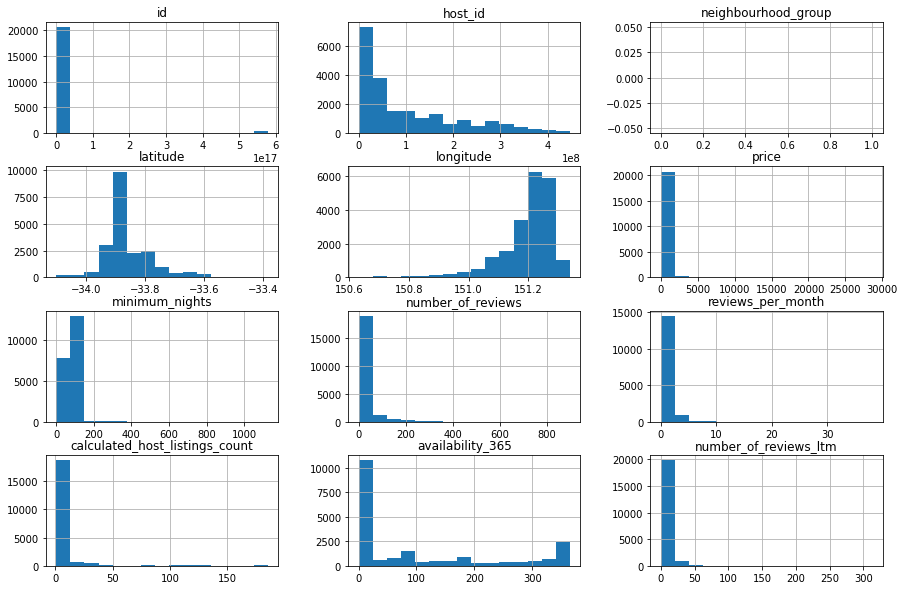

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

Vamos investigar se há presença de outliers


In [ ]:
# ver resumo estátisto das váriavies numéricas:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'license']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,20891.000000,20891.000000,20891.000000,15480.000000,20891.000000,20891.000000
mean,250.100953,59.814992,18.746781,0.703238,8.355703,102.568187
std,494.321771,53.367768,44.330461,1.141375,25.267494,133.375313
min,13.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,80.000000,3.000000,0.000000,0.060000,1.000000,0.000000
50%,144.000000,90.000000,3.000000,0.220000,1.000000,8.000000
75%,250.000000,90.000000,14.000000,0.920000,3.000000,180.000000
max,28613.000000,1125.000000,899.000000,38.090000,185.000000,365.000000


Analisando o resumo estatísco notamos a presença de outliers nas variantes `price` e `minimum_nights`:


*   A coluna `price` tem 75% do seu valor abaixo de 250 com o valor máximo de 28613.
*   A variante `minimum_nights` possui a quantidade mínima de noites com mais de 1000 dias




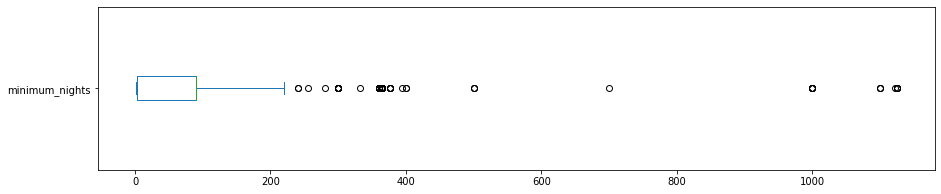

minimum_nights: valores acima de 120:
152 entradas
0.7276%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 120 dias para minimum_nights
print("minimum_nights: valores acima de 120:")
print("{} entradas".format(len(df[df.minimum_nights > 120])))
print("{:.4f}%".format((len(df[df.minimum_nights > 120]) / df.shape[0])*100))

Bloxplot para `price`


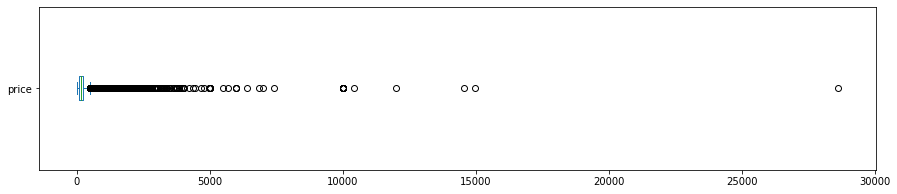

price: valores acima de 1000:
616 entradas
2.9486%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 1000 para price
print("price: valores acima de 1000:")
print("{} entradas".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))

Histograma sem *outliers* 

Vamos plota o histograma limpo e sem os *outliers*

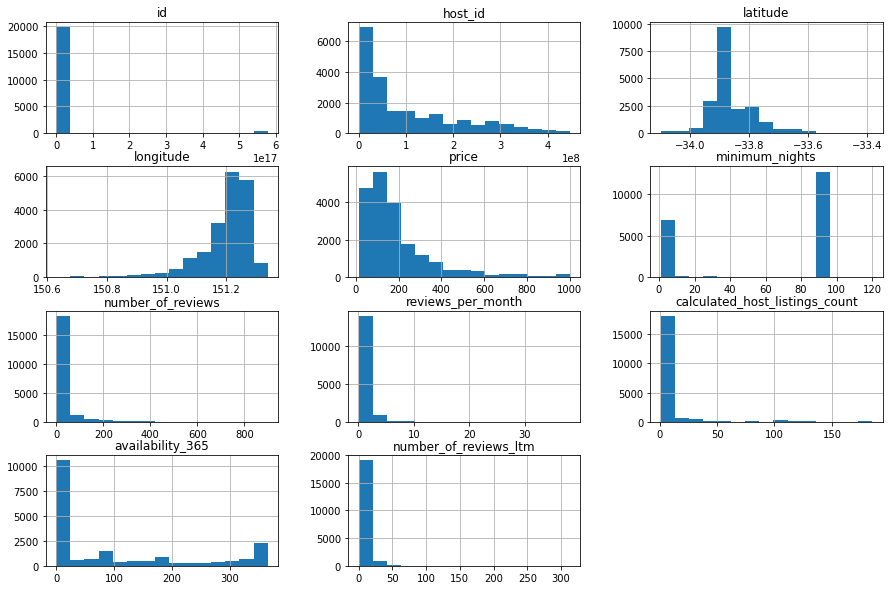

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 120].index, axis=0, inplace=True)  




# remover `neighbourhood_group` pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)      

#plotar histograma
df_clean.hist(bins=15, figsize=(15,10)); 
              

### **Q4. Qual a média dos preços de aluguel?**
Estamos usando os dados sem os *outliers*

In [ ]:
# ver a média da coluna `price``

df_clean.price.describe()

count    20128.000000
mean       194.829491
std        178.462605
min         13.000000
25%         80.000000
50%        140.000000
75%        240.000000
max       1000.000000
Name: price, dtype: float64

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

Criar uma matriz de correlação
Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()


# mostrar a matriz de correlação
display(corr)



,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.226906,-0.012502,0.039374,0.092405,0.103250
minimum_nights,-0.226906,1.000000,-0.335360,-0.479995,-0.226951,-0.352536
number_of_reviews,-0.012502,-0.335360,1.000000,0.712876,-0.029000,0.155501
reviews_per_month,0.039374,-0.479995,0.712876,1.000000,0.024085,0.231882
calculated_host_listings_count,0.092405,-0.226951,-0.029000,0.024085,1.000000,0.238611
availability_365,0.103250,-0.352536,0.155501,0.231882,0.238611,1.000000


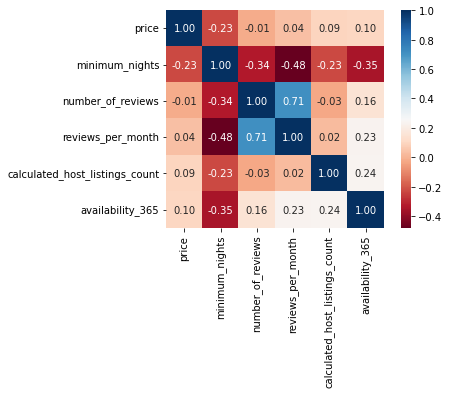

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o `método value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    12874
Private room        6812
Shared room          314
Hotel room           128
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.639607
Private room       0.338434
Shared room        0.015600
Hotel room         0.006359
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Pittwater           410.420814
Mosman              324.871901
Manly               305.476636
Warringah           272.703518
Sutherland Shire    247.567867
Woollahra           226.653646
Waverley            226.368027
Lane Cove           205.325000
Leichhardt          205.093418
North Sydney        202.636000
Name: price, dtype: float64

Analisando os preço por bairro vimos que *Pittwater*,Mosman* e *Manly* são as três localidades mais caras do dataset.
*Manly*, para mim, já era uma certeza que estaria entre as localidades mais caras. *Pittwater* e *Mosman* apesar se serem boas regiões, são longe do centro e dos principais pontos turísticos da cidade.
Vamos verificar quantas entradas existem para tais localidades para definir se a amostra é representativa.

In [ ]:
#ver a quantidade de imoveis em *Pittwater*
print(df_clean[df_clean.neighbourhood=="Pittwater"].shape)

#ver as 3 primeiras entradas em *Pittwater*
df_clean[df_clean.neighbourhood == "Pittwater"] 

(663, 17)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
62,105938,Secret Beach Hideaway with Tropical Gardens,549372,Susanne,Pittwater,-33.64793,151.31775,Entire home/apt,307,14,17,2022-01-22,0.26,1,322,4,PID-STRA-6470
63,143280,Garden Retreat Northern Beaches,695349,Family Team -,Pittwater,-33.69512,151.28875,Entire home/apt,271,5,31,2020-02-10,0.39,1,306,0,PID-STRA-30119
108,421997,Leafy Studio with Tranquil Pittwater View,2098455,Leigh & Phillip,Pittwater,-33.63919,151.32076,Entire home/apt,190,2,143,2022-02-20,1.28,1,333,10,PID-STRA-2339
122,539231,Newport Beach Sydney Ocean View,2649331,Ann-Maree & Malcolm,Pittwater,-33.65032,151.31931,Entire home/apt,200,2,218,2022-02-10,1.88,1,352,13,PID-STRA-5301
125,587669,Magnificent ocean views!,2908016,Bobbie,Pittwater,-33.60319,151.33141,Entire home/apt,550,2,87,2022-02-19,0.92,1,142,7,PID-STRA-25259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20827,7958008,Avalon Getaway - spectacular views,41970381,Helen,Pittwater,-33.63743,151.33250,Entire home/apt,239,2,58,2021-10-30,0.74,1,10,5,PID-STRA-8013-1
20830,14043410,Stylish New Beach 2 bedroom apart Warriewood b...,84171141,Kelly,Pittwater,-33.69087,151.30939,Entire home/apt,200,90,24,2018-10-02,0.37,1,292,0,NaN
20833,14951907,SeaPod - Beach Front Holiday Home,12252725,Richard,Pittwater,-33.63901,151.33332,Entire home/apt,480,1,166,2022-02-25,2.50,1,238,36,PID-STRA-3831
20840,21269648,Malibu beachfront apartment,153853333,Helen,Pittwater,-33.67696,151.31627,Entire home/apt,340,7,12,2022-01-01,0.24,1,358,3,PID-STRA-4685


In [ ]:
# ver quantidade de imóveis em *Mosman*
print(df_clean[df_clean.neighbourhood == "Mosman"].shape)

# ver as 3 entradas em *Mosman*
df_clean[df_clean.neighbourhood == "Mosman"]

(242, 17)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
49,58506,"Studio Yindi @ Mosman, Sydney",279955,John,Mosman,-33.817480,151.234840,Entire home/apt,150,2,311,2022-03-03,2.28,1,250,26,PID-STRA-6093
92,365953,En suite room in gorgeous house!,1827246,Jen,Mosman,-33.821830,151.236450,Private room,145,90,6,2017-01-14,0.08,1,358,0,NaN
155,771147,Apartment with Water Views,4068265,Daniela,Mosman,-33.815400,151.241960,Private room,80,90,3,2019-01-30,0.03,1,363,0,NaN
157,775552,Balmoral beach Garden Oasis Mosman,2650727,Robbie,Mosman,-33.825320,151.246500,Entire home/apt,189,3,210,2022-02-28,1.88,1,265,26,Exempt
172,752978,Balmoral Beach Cottage with Garden,3645455,Tracey,Mosman,-33.827230,151.249060,Entire home/apt,599,7,6,2022-01-03,0.05,1,259,1,PID-STRA-9655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20646,557574319699710190,Renovated apartment with bay views & pool,13170337,Michael,Mosman,-33.840016,151.232051,Entire home/apt,375,4,0,NaN,NaN,1,38,0,PID-STRA-33093
20766,571979737951763682,4 bedroom heritage home close to Balmoral Beach,2453531,Jemma,Mosman,-33.834688,151.238459,Entire home/apt,400,90,0,NaN,NaN,1,365,0,NaN
20816,872423,Room in Balmoral Mosman with views!,3221674,Sarah & Lachie,Mosman,-33.814870,151.252810,Private room,65,90,71,2019-01-15,0.65,1,364,0,NaN
20817,1134012,Balmoral Beach Beauty,6220893,Olivia,Mosman,-33.823700,151.254660,Entire home/apt,270,2,201,2022-02-28,1.88,5,313,31,PID-STRA-3015


In [ ]:
# ver quantidade de imóveis em *Manly*
print(df_clean[df_clean.neighbourhood == "Manly"].shape)

# ver as 3 entradas em *Manly*
df_clean[df_clean.neighbourhood == "Manly"]

(963, 17)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3817911,1 bedroom entire floor harbour view apartment,19628833,Bob,Manly,-33.797830,151.266100,Entire home/apt,240,3,29,2022-01-30,0.44,2,269,3,Exempt
5,40471151,Spectacular Iconic Beach-Front Manly 3 B/R Apt,464571,Sonia,Manly,-33.797570,151.289320,Entire home/apt,391,2,80,2022-03-06,2.99,1,100,39,PID-STRA-1135
6,40823979,"Gorgeous, spacious, entire coastal home with pool",123695021,Anna,Manly,-33.790560,151.259630,Entire home/apt,450,14,9,2022-01-01,0.34,1,29,2,PID-STRA-5689
7,46720763,One bedroom apartment - 1 block away from beach,89231742,Daiana,Manly,-33.793780,151.285520,Entire home/apt,50,90,0,NaN,NaN,1,0,0,NaN
8,46857888,FAIRLIGHT LUXE - The Scout Group,43736801,The Scout Group,Manly,-33.797280,151.274770,Entire home/apt,500,90,0,NaN,NaN,26,0,0,PID-STRA-27760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20765,571978039110620297,DOUBLE ROOM - Amazing location in Manly!,61148901,Peter,Manly,-33.798290,151.285883,Private room,95,1,0,NaN,NaN,7,361,0,Exempt
20789,574184785178440047,Exceptional townhome in amazing location,18226665,Dean,Manly,-33.797729,151.272809,Entire home/apt,800,120,0,NaN,NaN,1,270,0,NaN
20790,574268733677776137,Renovated spacious 1 bed flat with deck and ga...,16159972,Roz,Manly,-33.796447,151.263422,Entire home/apt,80,2,0,NaN,NaN,2,324,0,PID-STRA-33838
20815,577456056867678963,Premium Ocean View Apartment Manly,235137306,MadeComfy Sydney,Manly,-33.802041,151.296528,Entire home/apt,500,1,0,NaN,NaN,2,0,0,PID-STRA-33936


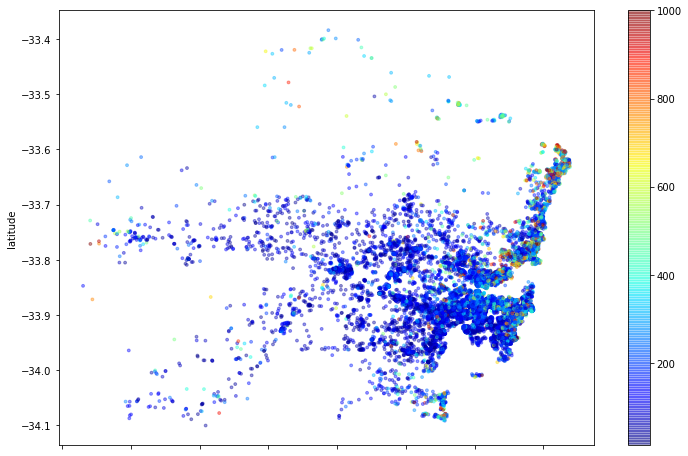

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'],s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.describe()

count    20128.000000
mean        58.495330
std         41.701555
min          1.000000
25%          3.000000
50%         90.000000
75%         90.000000
max        120.000000
Name: minimum_nights, dtype: float64

## Conclusões


Considerando que fizemos uma análise superficial dos dados do Airbnb,foi possivel encontrar alguns *outliers*.

Um fato que chamou a atenção foi que 60% dos imóveis não possuem licença de funcionamento. De acordo com a lei local, imóveis de curta estadia precisam de uma licensa específica. 
Este aspecto afeta de maneira direta a variável `minimum_nights` já que 75% das entradas são para 90 noites mínimas de estadia. Provavelmente esta foi uma maniera que os *hosts* encontraram de não usar a lincença específica para imóveis de curta estadia.

A amostra para as localidades mais caras se mostraram ser representativas. O volume de entrada para as três localidades valida a nossa analise.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.


